In [22]:
pip install pandas numpy scikit-learn matplotlib


     ---------------------------------------- 0.0/111.9 kB ? eta -:--:--
     ---------- ----------------------------- 30.7/111.9 kB ? eta -:--:--
     -------------------------------- ------ 92.2/111.9 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ 111.9/111.9 kB 932.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.1 MB 4.1 MB/s eta 0:00:02
   - -------------------------------------- 0.3/8.1 MB 3.0 MB/s eta 0:00:03
   - -------------------------------------- 0.3/8.1 MB 2.7 MB/s eta 0:00:03
   - -------------------------------------- 0.3/8.1 MB 2.7 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.1 MB 3.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.1 MB 2.7 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 2.4 MB/s eta 0:00:04
   --- ----------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\SP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Dataset Shape: (25000, 17)
First 5 rows:
        age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_

C:\Users\SP\AppData\Local\Temp\ipykernel_13292\923885752.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\SP\AppData\Local\Temp\ipykernel_13292\923885752.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

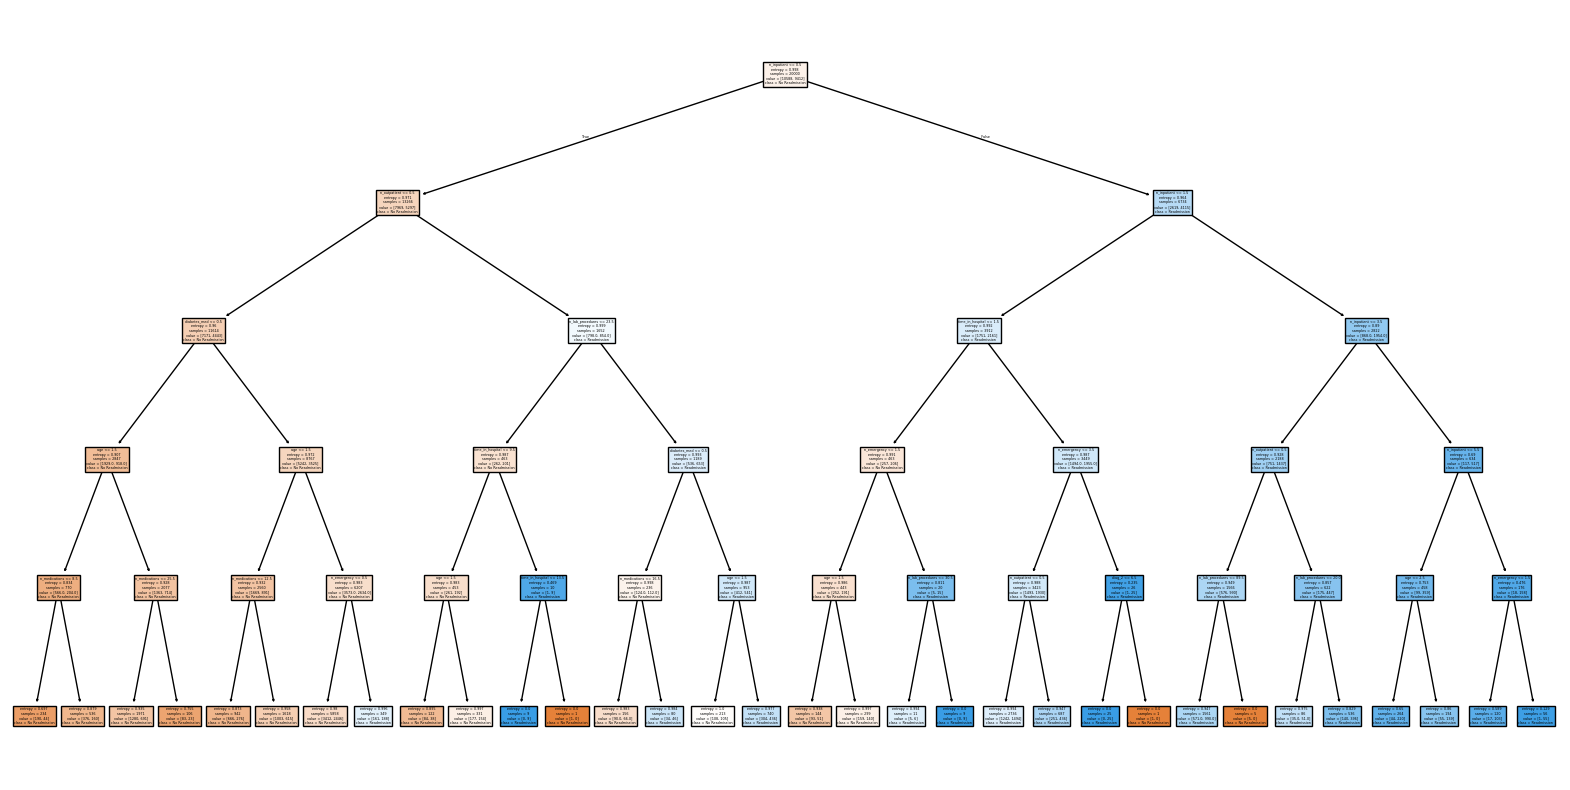

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset using the correct file path
df = pd.read_csv(r"E:\CTS\CTS_Hackathon\dataset.csv")

# Display basic information
print("Dataset Shape:", df.shape)
print("First 5 rows:\n", df.head())
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())

# Handling missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

# Encoding categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target
X = df.drop('readmitted', axis=1)  # Change 'readmitted' to actual target column if needed
y = df['readmitted']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No Readmission', 'Readmission'], filled=True)
plt.show()


Dataset Shape: (25000, 17)
First 5 rows:
        age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_

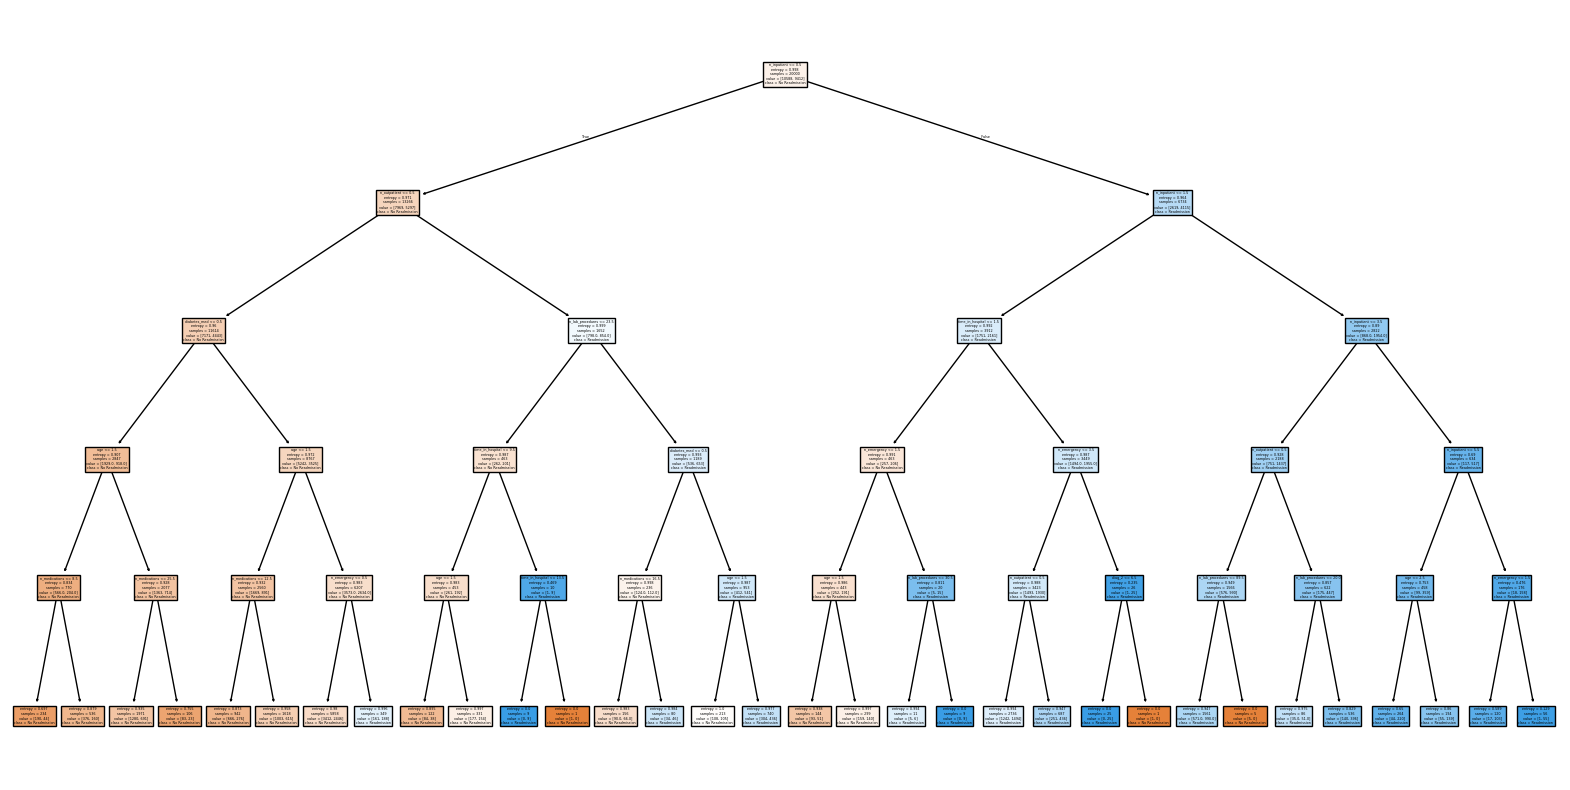

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"E:\CTS\CTS_Hackathon\dataset.csv")

# Display basic information
print("Dataset Shape:", df.shape)
print("First 5 rows:\n", df.head())
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())

# Handling missing values safely
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].median())

# Encoding categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target
X = df.drop('readmitted', axis=1)  # ensure 'readmitted' is the correct target column
y = df['readmitted']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No Readmission', 'Readmission'], filled=True)
plt.show()
